<a href="https://colab.research.google.com/github/MinsooKwak/Kaggle_note/blob/main/Data_science/lung_cancer_analysis_note.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Kaggle 필사 study하기**

참고 링크: https://www.kaggle.com/code/hasibalmuzdadid/lung-cancer-analysis-accuracy-96-4/notebook

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm  # 폰트 관련 용도

In [3]:
import warnings
warnings.filterwarnings('ignore')

### 한글 폰트 설치 및 설정

In [ ]:
#!sudo apt-get install -y fonts-nanum  ## 폰트설치
#!sudo fc-cache -fv ## 폰트 업데이트
#!rm ~/.cache/matplotlib -rf ## 캐쉬된 matplotlib 폰트 삭제하여 재로딩

In [4]:
# ttflist에 Nanum 글자 들어가는 폰트 있는지 확인하는 코드
f = [f.name for f in fm.fontManager.ttflist if 'Nanum' in f.name]
f

['NanumSquare',
 'NanumMyeongjo',
 'NanumGothic',
 'NanumSquare',
 'NanumBarunGothic',
 'NanumBarunGothic',
 'NanumSquareRound',
 'NanumSquareRound',
 'NanumMyeongjo',
 'NanumGothic']

In [5]:
#폰트종류설정
plt.rcParams["font.family"] ='NanumSquare'

# 현재 설정되어 있는 폰트 사이즈와 글꼴을 알아보자
!python --version
def current_font():
  print(f"설정 폰트 글꼴: {plt.rcParams['font.family']}, 설정 폰트 사이즈: {plt.rcParams['font.size']}")  # 파이썬 3.6 이상 사용가능하다
        
current_font()

Python 3.7.13
설정 폰트 글꼴: ['NanumSquare'], 설정 폰트 사이즈: 10.0


In [26]:
path = '/content/drive/MyDrive/text/NanumSquareR.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

NanumSquare


In [27]:
import matplotlib.pyplot as plt
from matplotlib import font_manager
plt.rcParams['axes.unicode_minus']=False
font_path = '/content/drive/MyDrive/text/NanumSquareR.ttf'
fontprop = font_manager.FontProperties(fname=font_path, size=20)

plt.rc('font', family='NanumBarunGothic')

# EDA

In [8]:
df = pd.read_csv('/content/drive/MyDrive/data/kaggle_data/survey_lung_cancer.csv')

In [9]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


이 중 범주형으로 보이는 항목의 unique한 값들을 살펴보도록 하겠다.

In [10]:
print(df['GENDER'].unique())
print(df['LUNG_CANCER'].unique())

['M' 'F']
['YES' 'NO']


### **ABOUT DATASET**

- Gender : M, F
- AGE : patient age
- SMOKING : 2[Yes], 1[No]
- ANXIETY : 2[Yes], 1[No]
- PEER_PRESSURE : 2[Yes], 1[No]
- CHRONIC DISEASE : 2[Yes], 1[No]
- FATIGUE : 2[Yes], 1[No]
- ALLERGY : 2[Yes], 1[No]
- WHEEZIZNG : 2[Yes], 1[No]
- ALCOHOL CONSUMING : 2[Yes], 1[No]
- COUGHING : 2[Yes], 1[No]
- SHROTNESS OF BREATH : 2[Yes], 1[No]
- SWALLOWING DIFFICULTY : 2[Yes], 1[No]
- CHEST PAIN : 2[Yes], 1[No]
- LUNG_CANCER : Yes(Pos), NO(neg)


In [11]:
print(f'현재 {df.shape[0]}개의 dataset이 존재함')
print(f'총 {df.shape[1]}개의 컬럼으로 구성되어 있음')

현재 309개의 dataset이 존재함
총 16개의 컬럼으로 구성되어 있음


### **Data types**

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

GENDER, LUNG_CANCER 은 object 형태로, 나머지는 int 형태의 dtype을 가진다.

### **Dataset Summary**

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,309.0,62.673139,8.210301,21.0,57.0,62.0,69.0,87.0
SMOKING,309.0,1.563107,0.496806,1.0,1.0,2.0,2.0,2.0
YELLOW_FINGERS,309.0,1.569579,0.495938,1.0,1.0,2.0,2.0,2.0
ANXIETY,309.0,1.498382,0.500808,1.0,1.0,1.0,2.0,2.0
PEER_PRESSURE,309.0,1.501618,0.500808,1.0,1.0,2.0,2.0,2.0
CHRONIC DISEASE,309.0,1.504854,0.500787,1.0,1.0,2.0,2.0,2.0
FATIGUE,309.0,1.673139,0.469827,1.0,1.0,2.0,2.0,2.0
ALLERGY,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0
WHEEZING,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0
ALCOHOL CONSUMING,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0


-> 위의 내용은 df.descirbe(include=int).T에 대한 내용으로 int형에 대한 내용만 나왔음

In [15]:
# Boxplot 그려서 분포 확인해보면 좋을 듯 
# 1. 이상치 제거 전 (전체 데이터셋)
# 2. 이상치 제거 후 비교

object 형에 관한 내용 살펴보기

In [14]:
df.describe(include=object).T

,count,unique,top,freq
GENDER,309,2,M,162
LUNG_CANCER,309,2,YES,270


### **Null Data/ Drop Duplicate**

In [15]:
for i in df.columns:
  null_rate = df[i].isna().sum()/len(df)*100
  if null_rate > 0:
    print(f"{i}'s null rate : {null_rate.round(2)}%")
  else:
    print(f"No null : {i}")

No null : GENDER
No null : AGE
No null : SMOKING
No null : YELLOW_FINGERS
No null : ANXIETY
No null : PEER_PRESSURE
No null : CHRONIC DISEASE
No null : FATIGUE 
No null : ALLERGY 
No null : WHEEZING
No null : ALCOHOL CONSUMING
No null : COUGHING
No null : SHORTNESS OF BREATH
No null : SWALLOWING DIFFICULTY
No null : CHEST PAIN
No null : LUNG_CANCER


In [16]:
# 결측치의 합을 df형으로 다시 확인
df.isna().sum().to_frame().T

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
# 중복 데이터 개수
print(f'중복된 데이터 개수 : {df[df.duplicated()].shape[0]}')

중복된 데이터 개수 : 33


In [18]:
# 중복된 데이터 중 첫번째만 남기고 제거
df.drop_duplicates(keep='first', inplace=True)

print(f'중복된 데이터를 제고하고 남은 데이터 개수는 : {df.shape[0]}')

중복된 데이터를 제고하고 남은 데이터 개수는 : 276


# Visualization

**custom palette for visualization**

In [19]:
sns.set_style('whitegrid')                # whitegrid
sns.set_context('poster', font_scale=.7)  # poster(큰 사이즈), font_scale은 0.7
'''
------------------------------------------------------------------------------
# set_style : 그림의 전반적 모양 스타일링
  background color, grid, spine, tick 정의
  ㄴ default  : darkgrid
  ㄴ 변경     :
          1) Background color : dark, white
          2) Grid             : whitegrid, darkgrid
          3) Despine(축/테두리 제거)
              ㄴ spine : left, right, top, bottom
              ㄴ 1) default : top, right 제거
              ㄴ 2) sns.despine(left=True)  # left도 제거
              ㄴ 3) sns.despine(bottom=True)# bottom도 제거

-------------------------------------------------------------------------------
# set_context : 다양한 매체에 활용할 수 있도록 스타일링
  ㄴ 네 종류의 스케일(사이즈) 선택 가능
  ㄴ 스케일(사이즈) 종류 : paper, notebook, talk, poster
  ㄴ default : notebook
      ㄴ # paper  : 작은 스케일
      ㄴ # poster : 글씨가 조금씩 커짐 

  --------------------------------------------------------------------------
  ### 디테일하게 조정하고 싶을 때:
     sns.set_context()안에 rc 파라미터를 딕셔너리 형태로 넣어줌 (run command)
     ex) sns.set_context("poster", font_scale=1, rc={"grid.linewidth":5})

     ### rc 파라미터 종류
     {'axes.labelsize': 17.6,
      'axes.titlesize': 19.200000000000003,
      'font.size': 19.200000000000003,
      'grid.linewidth': 1.6,
      'legend.fontsize': 16.0,
      'lines.linewidth': 2.8000000000000003,
      'lines.markeredgewidth': 0.0,
      'lines.markersize': 11.200000000000001,
      'patch.linewidth': 0.48,
      'xtick.labelsize': 16.0,
      'xtick.major.pad': 11.200000000000001,
      'xtick.major.width': 1.6,
      'xtick.minor.width': 0.8,
      'ytick.labelsize': 16.0,
      'ytick.major.pad': 11.200000000000001,
      'ytick.major.width': 1.6,
      'ytick.minor.width': 0.8}
'''

'\n------------------------------------------------------------------------------\n# set_style : 그림의 전반적 모양 스타일링\n  background color, grid, spine, tick 정의\n  ㄴ default  : darkgrid\n  ㄴ 변경     :\n          1) Background color : dark, white\n          2) Grid             : whitegrid, darkgrid\n          3) Despine(축/테두리 제거)\n              ㄴ spine : left, right, top, bottom\n              ㄴ 1) default : top, right 제거\n              ㄴ 2) sns.despine(left=True)  # left도 제거\n              ㄴ 3) sns.despine(bottom=True)# bottom도 제거\n\n-------------------------------------------------------------------------------\n# set_context : 다양한 매체에 활용할 수 있도록 스타일링\n  ㄴ 네 종류의 스케일(사이즈) 선택 가능\n  ㄴ 스케일(사이즈) 종류 : paper, notebook, talk, poster\n  ㄴ default : notebook\n      ㄴ # paper  : 작은 스케일\n      ㄴ # poster : 글씨가 조금씩 커짐 \n\n  --------------------------------------------------------------------------\n  ### 디테일하게 조정하고 싶을 때:\n     sns.set_context()안에 rc 파라미터를 딕셔너리 형태로 넣어줌 (run command)\n     ex) sns.set_conte

참조: https://hleecaster.com/python-seaborn-set-style-and-context/

In [20]:
palette=  ["#1d7874","#679289","#f4c095","#ee2e31","#ffb563","#918450","#f85e00","#a41623","#9a031e","#d6d6d6","#ffee32","#ffd100","#333533","#202020"]

sns.palplot을 통해 저장한 팔레트 불러올 수 있음

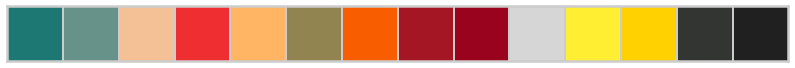

In [21]:
sns.palplot(sns.color_palette(palette))

palette 관련 스터디 추가 참조 자료 : https://hleecaster.com/python-seaborn-color/ 

# Digging Deeper

In [22]:
# df 보존을 위해 copy해 df_temp 만들어 사용
df_temp = df.copy()
df_temp.head(3)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO


- GENDER 변경 가능
- 1, 2로 카테고리 분류되어 있는 것 변경 가능

In [23]:
# M -> Male, F -> Female
df_temp['GENDER'] = df_temp['GENDER'].replace({'M':'Male', 'F':'Female'})

# 2: Yes , 1: No 변경
for col in df_temp.columns:
  df_temp[col] = df_temp[col].replace({2:'YES', 1:'NO'})

df_temp.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,Male,69,NO,YES,YES,NO,NO,YES,NO,YES,YES,YES,YES,YES,YES,YES
1,Male,74,YES,NO,NO,NO,YES,YES,YES,NO,NO,NO,YES,YES,YES,YES
2,Female,59,NO,NO,NO,YES,NO,YES,NO,YES,NO,YES,YES,NO,YES,NO
3,Male,63,YES,YES,YES,NO,NO,NO,NO,NO,YES,NO,NO,YES,YES,NO
4,Female,63,NO,YES,NO,NO,NO,NO,NO,YES,NO,YES,YES,NO,NO,NO


## Lung Cancer 양성

In [24]:
df_temp_pos = df_temp[df_temp['LUNG_CANCER']=='YES']
df_temp_pos.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,Male,69,NO,YES,YES,NO,NO,YES,NO,YES,YES,YES,YES,YES,YES,YES
1,Male,74,YES,NO,NO,NO,YES,YES,YES,NO,NO,NO,YES,YES,YES,YES
5,Female,75,NO,YES,NO,NO,YES,YES,YES,YES,NO,YES,YES,NO,NO,YES
6,Male,52,YES,NO,NO,NO,NO,YES,NO,YES,YES,YES,YES,NO,YES,YES
7,Female,51,YES,YES,YES,YES,NO,YES,YES,NO,NO,NO,YES,YES,NO,YES


### 양성인 경우의 Age Distribution

**# subplot() vs. subplots()**

**case1. 하나씩 설정 (subplot)**
- nrows, ncols, index (각 정수는 10보다 작은 값) 

```
plt.subplot(2,1,1)
plt.subplot(2,1,2)
plt.show()
```
- projection 
  - 기본값: None (rectilinear가 입력)
  - True : projection= 'polar'
  - None, 'aitoff', 'hammer','lambert','mollwide','polar','rectilinear', str


**case2. 한번에 설정 (subplots)**

```
plt.subplots(nrow=2, ncols=1)
plt.show()
```




참조 : https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=heygun&logNo=221520454294

참조2 : https://runebook.dev/ko/docs/matplotlib/_as_gen/matplotlib.pyplot.subplot

참조3 : https://kongdols-room.tistory.com/98

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import font_manager
plt.rcParams['axes.unicode_minus']=False
font_path = '/content/drive/MyDrive/text/NanumSquareR.ttf'
fontprop = font_manager.FontProperties(fname=font_path, size=20)

plt.rc('font', family='NanumBarunGothic')

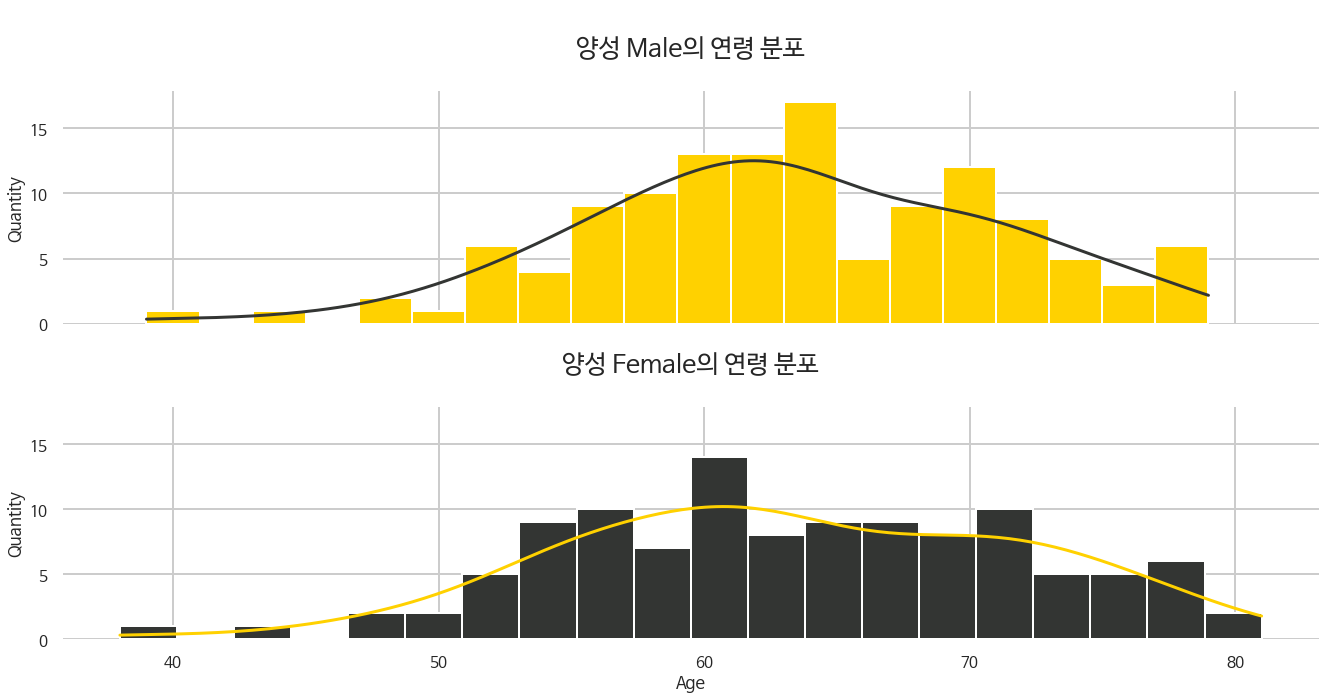

In [28]:
fig, axes = plt.subplots(nrows=2,ncols=1, figsize=(20,10), sharex=True, sharey=True)
# fig   : figure (전체 subplot을 의미 == 전체 사이즈)
# axes  : 전체 중 낱개 
  ### subplot의 경우는 부분을 지시하는 키워드로 하나의 값(axes)만 받을 수 있음
  ### subplots의 경우는 axes 여러개의 값
# sharex : Xtick의 값을 각각 공유할지 안할지  # sharex=False이면 x축 값 모두 다르게 출력
# sharey : Ytick의 값을 각각 공유할지 안할지  # sharey=False이면 y축 값 모두 다르게 출력


# tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)
### 자동으로 명시된 여백(padding)에 관련된 서브플롯 파라미터 조정
    # pad   : figure 모서리와 서브플롯 모서리 사이의 여백(padding)을 설정
    # h_pad : 높이의 여백
    # w_pad : 너비의 여백 
    # rect  : 서브플롯을 넣기 위한 사각형 설정(왼,바닥,오,위)
              # 총 크기 대비 정규화된 값
              # 기본: (0,0,1,1)
plt.tight_layout(pad=4.0)


# 양성 Male의 Age 분포
sns.histplot(df_temp_pos[df_temp_pos['GENDER']=='Male']['AGE'], color=palette[11], kde=True, ax=axes[0], bins=20, alpha=1, fill=True)
axes[0].lines[0].set_color(palette[12])
axes[0].set_title('\n양성 Male의 연령 분포\n', fontsize=25)
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Quantity')

# 양성 Female의 Age 분포
sns.histplot(df_temp_pos[df_temp_pos['GENDER']=='Female']['AGE'], color=palette[12], kde=True, ax=axes[1], bins=20, alpha=1, fill=True)
axes[1].lines[0].set_color(palette[11])
axes[1].set_title('\n양성 Female의 연령 분포\n', fontsize=25)
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Quantity')

# 축 없애기 (기본: top, right)
sns.despine(left=True, bottom=True)
plt.show()

Male, Female의 두 가지 경우를 합쳐보면

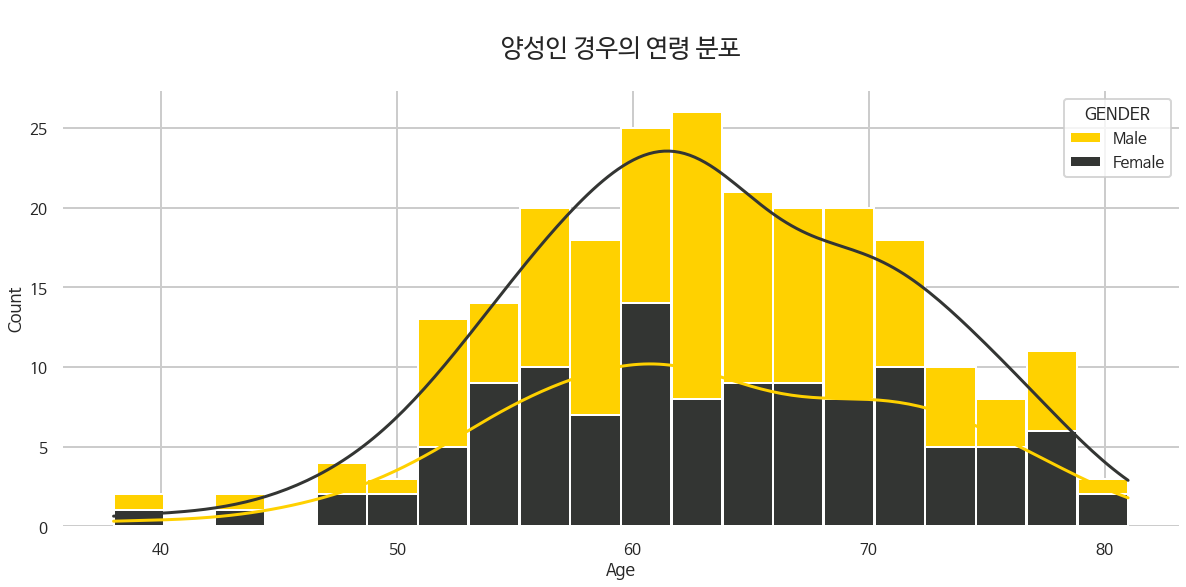

In [29]:
plt.subplots(figsize=(20,8))
p = sns.histplot(data=df_temp_pos, x="AGE", hue="GENDER", 
                 multiple="stack",          # multiple="stack"이용해서 stack할 수 있음
                 palette=palette[11:13],    # 11~13번 색상 사용
                 kde=True, shrink=.99,bins=20, alpha=1, fill=True)

p.axes.lines[0].set_color(palette[11])
p.axes.lines[1].set_color(palette[12])
p.axes.set_title("\n양성인 경우의 연령 분포\n", fontsize=25)
plt.xlabel("Age")
plt.ylabel('Count')

sns.despine(left=True, bottom=True)
plt.show()

### 양성인 경우의 Gender Distribution

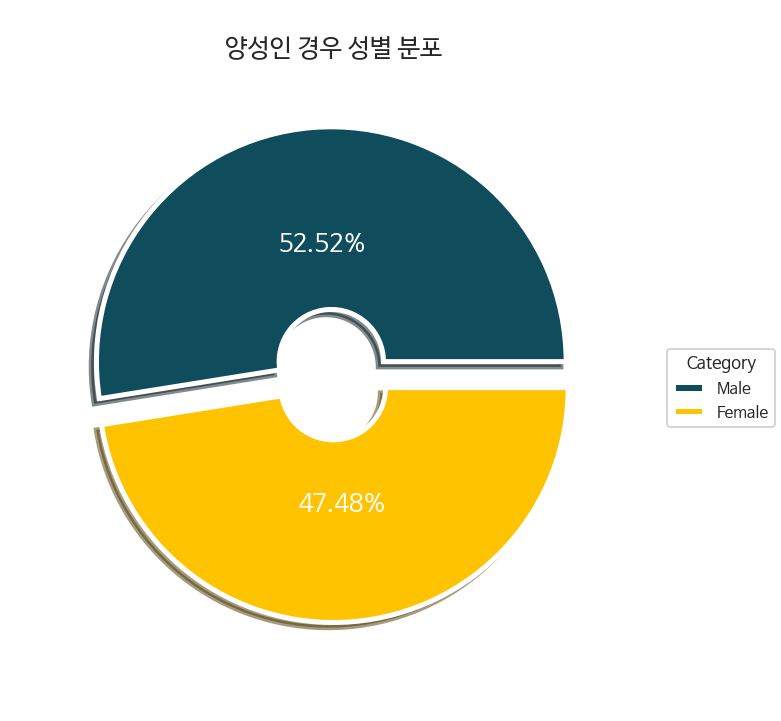

In [30]:
plt.subplots(figsize=(12, 12))

labels = "Male","Female"
size = 0.7

wedges, texts, autotexts = plt.pie([len(df_temp_pos[df_temp_pos["GENDER"]=="Male"]["GENDER"]),
                                    len(df_temp_pos[df_temp_pos["GENDER"]=="Female"]["GENDER"])],
                                    explode = (0.1,0),
                                    textprops=dict(size= 25, color= "white"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.5,
                                    radius=.9, 
                                    colors = ["#0f4c5c","#FFC300"], 
                                    shadow = True,
                                    wedgeprops= dict(width = size, edgecolor = "white", linewidth = 5),
                                    startangle = 0)

plt.legend(wedges, labels, title="Category",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("\n양성인 경우 성별 분포",fontsize=25)
plt.show()